In [2]:
"""

[1.2] 对比分析

对比分析:两个互相联系的指标进行比较

绝对数比较(相减) / 相对数比较(相除)
结构分析、比例分析、空间比较分析、动态对比分析

"""

'\n\n[1.2] 对比分析\n\n对比分析:两个互相联系的指标进行比较\n\n绝对数比较(相减) / 相对数比较(相除)\n结构分析、比例分析、空间比较分析、动态对比分析\n\n'

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as psl
plt.rcParams['font.family'] = 'Arial Unicode MS'
print(psl.available)
psl.use("fivethirtyeight")
%matplotlib inline

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


                A_sale      B_sale
2020-06-01  946.073417  502.453709
2020-06-02  565.836283  499.136661
2020-06-03  260.181815  629.045935
2020-06-04  352.350859  201.044277
2020-06-05  511.623872  590.673801


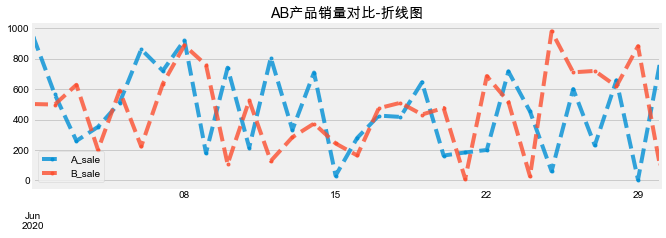

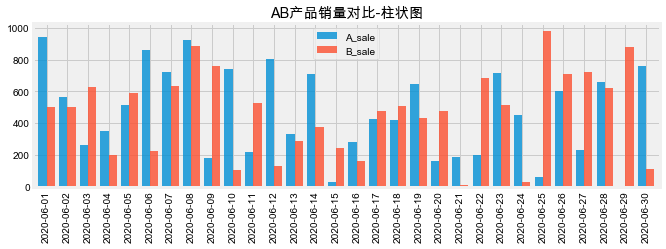

In [4]:
# 1.绝对数比较:相减
# 相互对比的指标在量级上不能差别过大
# (1)折线图比较
# (2)多系列柱状图比较

data = pd.DataFrame(np.random.rand(30, 2)*1000, columns=['A_sale', 'B_sale'], index=pd.period_range('20200601', '20200630'))
print(data.head())
# 折线图比较
data.plot(kind='line', style='--.', alpha=0.8, figsize=(10, 3), title="AB产品销量对比-折线图", use_index=True)

# 多系列柱状图比较
data.plot(kind='bar', width=0.8, alpha=0.8, figsize=(10, 3), title="AB产品销量对比-柱状图")

[Text(0, 0, '2020-06-01'),
 Text(0, 0, '2020-06-07'),
 Text(0, 0, '2020-06-13'),
 Text(0, 0, '2020-06-19'),
 Text(0, 0, '2020-06-25')]

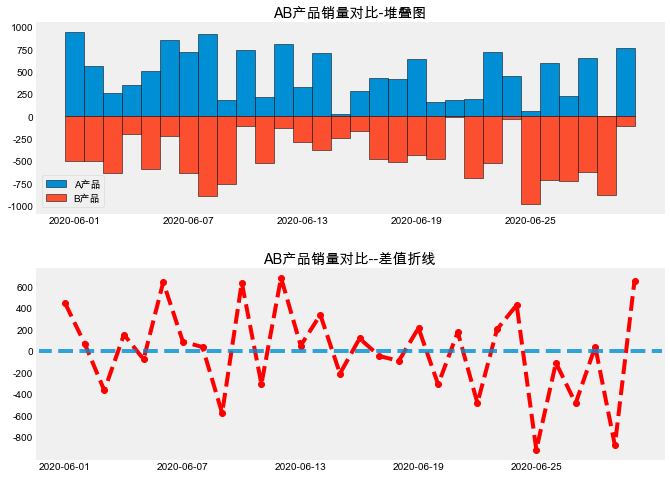

In [5]:
# 1.绝对数比较:相减
# (3)柱状图堆叠图+差值折线图比较

fig2 = plt.figure(figsize=(10, 8))
# 创建子图及间隔配置
plt.subplots_adjust(hspace=0.3)

ax1 = fig2.add_subplot(2, 1, 1)
x = range(len(data))
y1 = data["A_sale"]
y2 = -data["B_sale"]

plt.bar(x, y1, width=1, edgecolor='k', label='A产品')
plt.bar(x, y2, width=1, edgecolor='k', label='B产品')
plt.grid()
plt.title("AB产品销量对比-堆叠图")
plt.xticks(range(0, 30, 6))
plt.legend()
ax1.set_xticklabels(data.index[::6])

# 创建差值折线图
ax2 = fig2.add_subplot(2, 1, 2)
y3 = data["A_sale"] - data["B_sale"]
plt.plot(x, y3, '--ro')
plt.axhline(0, linestyle='--', alpha=0.8)  # 添加y轴参考线
plt.grid()
plt.title("AB产品销量对比--差值折线")
plt.xticks(range(0, 30, 6))
ax2.set_xticklabels(data.index[::6])


                A_sale      B_sale
2019-06-01  909.929150   72.675325
2019-06-02  858.070415   38.850668
2019-06-03  511.590706   37.160243
2019-06-04  702.938381  162.377335
2019-06-05  608.982762    9.920770
----------------------------------------------------------------------------------------
                A_sale      B_sale     A_per     B_per A_per(%) B_per(%)
2019-06-01  909.929150   72.675325  0.060253  0.030523    6.03%    3.05%
2019-06-02  858.070415   38.850668  0.056819  0.016317    5.68%    1.63%
2019-06-03  511.590706   37.160243  0.033876  0.015607    3.39%    1.56%
2019-06-04  702.938381  162.377335  0.046547  0.068198    4.65%    6.82%
2019-06-05  608.982762    9.920770  0.040325  0.004167    4.03%    0.42%


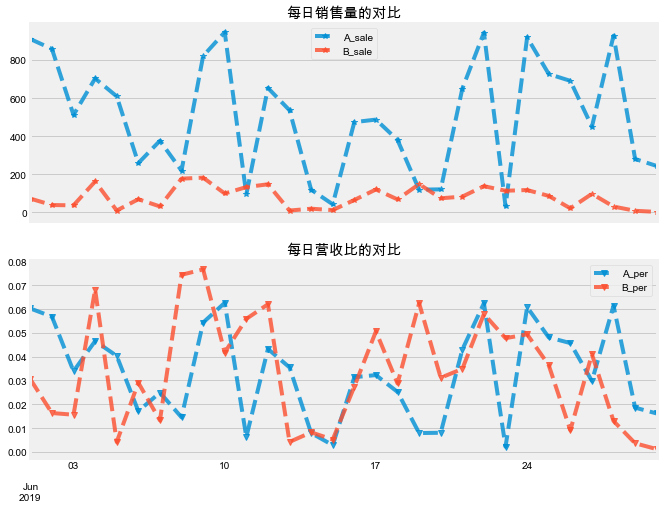

In [6]:
# 1.相对数比较:相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析、计划完成度分析
# (1)结构分析
# 在分组的基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反应总体的内部结构

# 创建数据:30天内A/B产品的日销售额
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000, 'B_sale':np.random.rand(30)*200},
                   index=pd.period_range('20190601', '20190630'))
print(data.head())
print('-' * 88)

# 计算出每天的营收比
data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
# 将每天的营收比转换为百分比形式
data['A_per(%)'] = data['A_per'].apply(lambda x: "%.2f%%" % (x*100))
data['B_per(%)'] = data['B_per'].apply(lambda x: "%.2f%%" % (x*100))
# 查看数据
print(data.head())

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
# 每日销售量的对比
data[['A_sale', 'B_sale']].plot(ax=axes[0], kind='line', style='--*', alpha=0.8, title="每日销售量的对比")
# 每日营收比的对比
data[["A_per", "B_per"]].plot(ax=axes[1], kind='line', style='--v', alpha=0.8, title="每日营收比的对比")

# 绝对值比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

   consumption       salary
0  2685.164526  5121.183658
1  2175.427848  5041.059699
2  2757.857308  5165.437595
3  2430.283031  5275.094768
4  2072.467929  5293.115750
----------------------------------------------------------------------------------------
   consumption       salary       c_s
0  2685.164526  5121.183658  0.524325
1  2175.427848  5041.059699  0.431542
2  2757.857308  5165.437595  0.533906
3  2430.283031  5275.094768  0.460709
4  2072.467929  5293.115750  0.391540


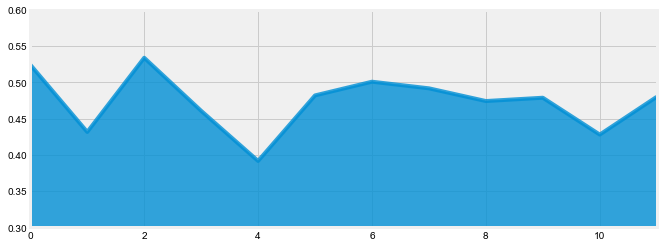

In [7]:
# 2.相对数比较:相除
# (2)比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为”比例相对数“
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({"consumption": np.random.rand(12)*1000 + 2000, "salary": np.random.rand(12)*500+5000})
print(data.head())
print('-' * 88)

# 计算比例相对数:消费收入比
data["c_s"] = data["consumption"] / data["salary"]
print(data.head())

# 创建面积图表达
data['c_s'].plot.area(alpha=0.8, figsize=(10, 4), ylim=[0.3, 0.6], grid=True)

                      A            B            C           D
2017-06-01  2516.803947  1578.707287  5604.499057  390.379243
2017-06-02   909.742164  1542.828891  5992.849158  360.056942
2017-06-03  2655.728818  1669.517344  7576.859268  323.289420
2017-06-04  2614.737307   320.875372  8626.093927  636.544815
2017-06-05  2016.592057  1224.990888  6520.975421    2.408297


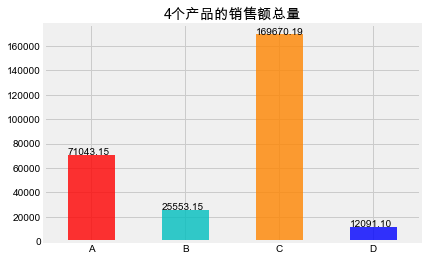

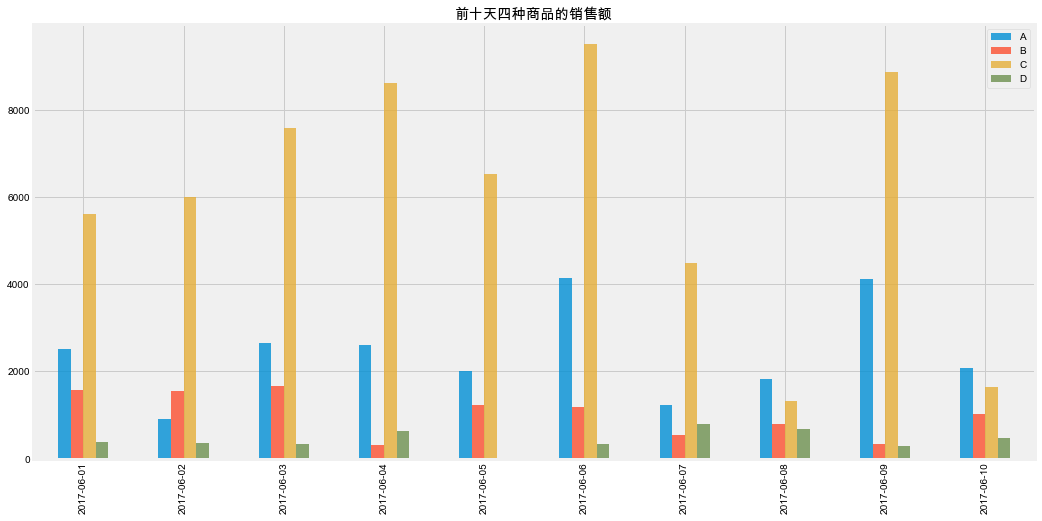

In [8]:
# 2.相对数比较:相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

# 创建数据:30天内A、B、C、D四个产品的销售情况
data = pd.DataFrame({'A':np.random.rand(30)*5000, 'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000, 'D':np.random.rand(30)*800},
                   index=pd.period_range('20170601', '20170630'))
print(data.head())

# 通过柱状图做横向比较:4个产品的销售额总量
data.sum().plot(kind='bar', color=['r', 'c', '#ff8500', 'b'], alpha=0.8, rot=0, title='4个产品的销售额总量')
# 展示销售总额
for x, y in zip(range(4), data.sum()):
    plt.text(x-0.25, y+0.1, "%.2f" % y)
    
# 多系列柱状图，横向比较前十天四种商品的销售额
data[:10].plot(kind='bar', alpha=0.8, title="前十天四种商品的销售额", figsize=(16, 8))

# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比

                      A
2019-06-01  2839.917875
2019-06-02  2688.426840
2019-06-03  1200.234838
2019-06-04  1078.574874
2019-06-05  2520.408458
----------------------------------------------------------------------------------------
                      A  base     l_growth     z_growth
2019-06-01  2839.917875  1000  1839.917875     0.000000
2019-06-02  2688.426840  1000  1688.426840  -151.491035
2019-06-03  1200.234838  1000   200.234838 -1488.192002
2019-06-04  1078.574874  1000    78.574874  -121.659964
2019-06-05  2520.408458  1000  1520.408458  1441.833584
----------------------------------------------------------------------------------------
                      A  base     l_growth     z_growth    lspeed    zspeed
2019-06-01  2839.917875  1000  1839.917875     0.000000  1.839918  0.000000
2019-06-02  2688.426840  1000  1688.426840  -151.491035  1.688427 -0.053343
2019-06-03  1200.234838  1000   200.234838 -1488.192002  0.200235 -0.553555
2019-06-04  1078.574874  1000    78.57

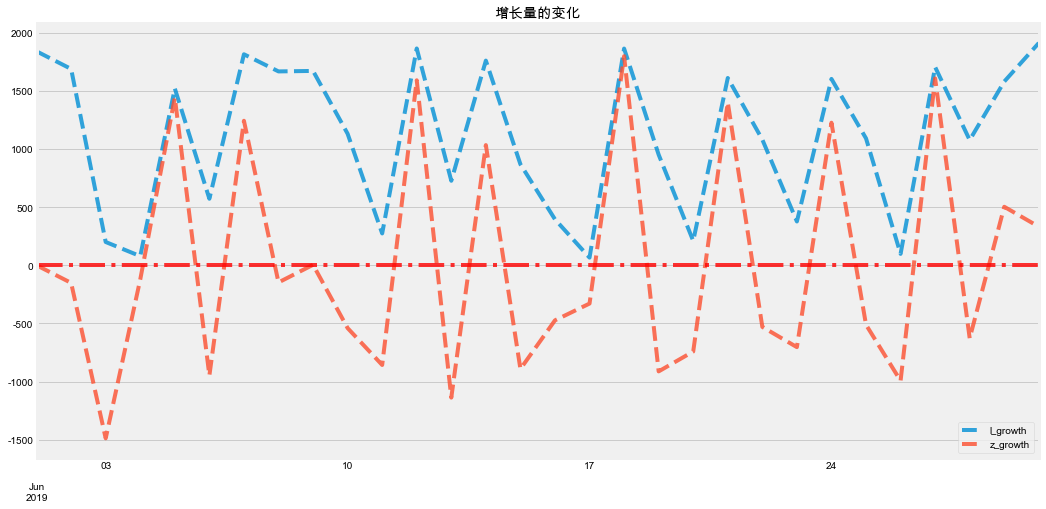

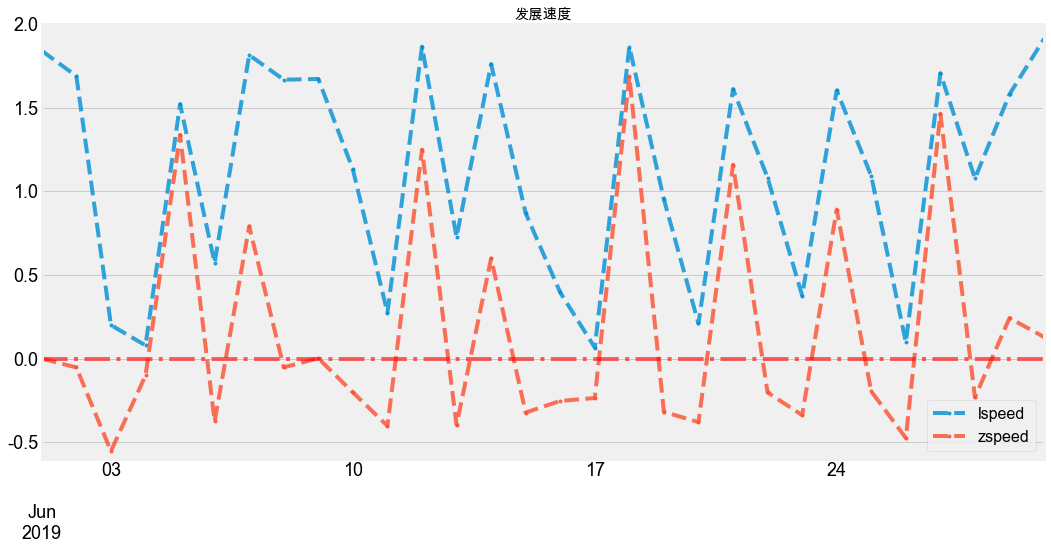

In [9]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

# 创建数据:30天内A产品的销售情况
data = pd.DataFrame({'A':np.random.rand(30)*2000 + 1000}, index=pd.period_range("20190601", '20190630'))
print(data.head())
print('-' * 88)

# 假设基期的销售额为1000，后面每一天都是计算期
data["base"] = 1000
data['l_growth'] = data['A'] - data['base']  # 累计增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平
data[data.isnull()] = 0  # 替换缺失值
print(data.head())
print('-' * 88)

# 通过折线图查看增长量的变化
data[['l_growth', 'z_growth']].plot(kind='line', style='--', alpha=0.8, figsize=(16, 8), title='增长量的变化')
plt.axhline(0, linestyle='-.', color='r', alpha=0.8)
plt.grid(True)

# 定基增长速度
data['lspeed'] = data['l_growth'] / data['base']
# 环比增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']
data[data.isnull()] = 0
print(data.head())
print('-' * 88)

# 用折线图显示发展速度
data[['lspeed', 'zspeed']].plot(fontsize=18, ylim=[-0.6, 2.0], figsize=(16, 8), kind='line', style='--.', alpha=0.8, title='发展速度')
plt.axhline(0, linestyle='-.', color='r', alpha=0.6)  # 添加y轴参考线
plt.legend(fontsize=16)